=== Inserción y búsqueda con 100 elementos ===
AVL (ordenado) -> Inserción: 0.0003s, Búsqueda: 0.0000s, Altura: 8
=== Inserción y búsqueda con 500 elementos ===
AVL (ordenado) -> Inserción: 0.0022s, Búsqueda: 0.0003s, Altura: 11
=== Inserción y búsqueda con 1000 elementos ===
BST (ordenado) -> Inserción: 0.0010s, Búsqueda: 0.0006s, Altura: 20
=== Inserción y búsqueda con 5000 elementos ===
AVL (ordenado) -> Inserción: 0.0324s, Búsqueda: 0.0036s, Altura: 15
=== Inserción y búsqueda con 10000 elementos ===
AVL (aleatorio) -> Inserción: 0.0606s, Búsqueda: 0.0070s, Altura: 16
=== Inserción y búsqueda con 20000 elementos ===
BST (ordenado) -> Inserción: 0.0347s, Búsqueda: 0.0178s, Altura: 38


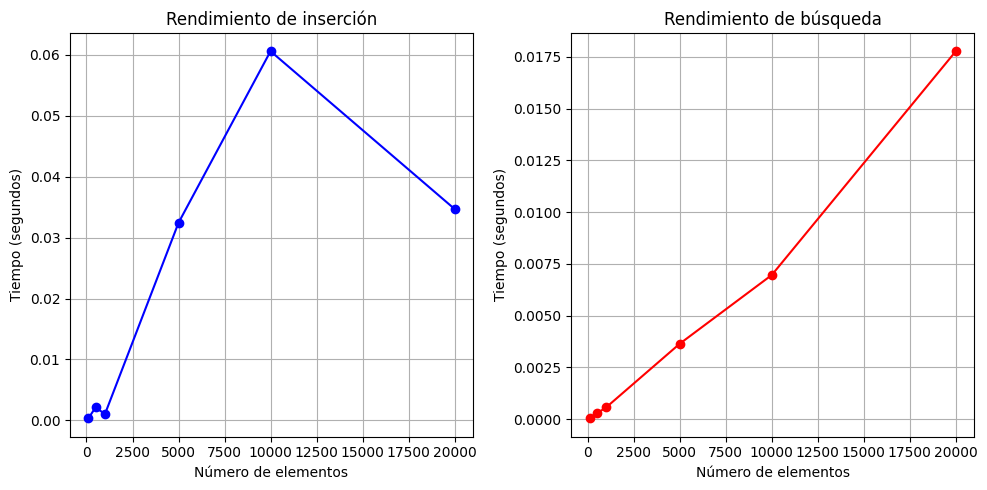

In [11]:
import random
import time
import matplotlib.pyplot as plt

# Clase Nodo
class Event2:
    def __init__(self, timestamp, description="Evento"):
        self.timestamp = timestamp
        self.description = description
        self.izquierda = None
        self.derecha = None
        self.altura = 1
        self.padre = None

# Clase Árbol AVL personalizado (Arbre)
class Arbre:
    def __init__(self):
        self.raiz = None

    def altura(self, nodo):
        if nodo is None:
            return 0
        return nodo.altura

    def factor_equilibrio(self, nodo):
        if nodo is None:
            return 0
        return self.altura(nodo.izquierda) - self.altura(nodo.derecha)

    def rotacion_derecha(self, z):
        y = z.izquierda
        if y is None:  # Add check to prevent NoneType error
            return z  # If y is None, return z without rotating

        T2 = y.derecha
        padre_z = z.padre

        y.derecha = z
        z.izquierda = T2
        z.padre = y

        if T2:
            T2.padre = z

        if z == self.raiz:
            self.raiz = y
        elif padre_z:
            if z == padre_z.izquierda:
                padre_z.izquierda = y
            else:
                padre_z.derecha = y

        y.padre = padre_z

        z.altura = 1 + max(self.altura(z.izquierda), self.altura(z.derecha))
        y.altura = 1 + max(self.altura(y.izquierda), self.altura(y.derecha))

        return y

    def rotacion_izquierda(self, z):
        y = z.derecha
        if y is None:  # Add check to prevent NoneType error
            return z  # If y is None, return z without rotating
        
        T2 = y.izquierda
        padre_z = z.padre

        y.izquierda = z
        z.derecha = T2
        z.padre = y

        if T2:
            T2.padre = z

        if z == self.raiz:
            self.raiz = y
        elif padre_z:
            if z == padre_z.izquierda:
                padre_z.izquierda = y
            else:
                padre_z.derecha = y

        y.padre = padre_z

        z.altura = 1 + max(self.altura(z.izquierda), self.altura(z.derecha))
        y.altura = 1 + max(self.altura(y.izquierda), self.altura(y.derecha))

        return y

    def insertar(self, raiz, timestamp, description="Evento", padre=None):
        if not raiz:
            nuevo_nodo = Event2(timestamp, description)
            nuevo_nodo.padre = padre
            return nuevo_nodo

        if timestamp <= raiz.timestamp:
            raiz.izquierda = self.insertar(raiz.izquierda, timestamp, description, raiz)
        else:
            raiz.derecha = self.insertar(raiz.derecha, timestamp, description, raiz)

        raiz.altura = 1 + max(self.altura(raiz.izquierda), self.altura(raiz.derecha))
        equilibrio = self.factor_equilibrio(raiz)

        if equilibrio > 1 and timestamp < raiz.izquierda.timestamp:
            return self.rotacion_derecha(raiz)
        if equilibrio < -1 and timestamp > raiz.derecha.timestamp:
            return self.rotacion_izquierda(raiz)
        if equilibrio > 1 and timestamp > raiz.izquierda.timestamp:
            raiz.izquierda = self.rotacion_izquierda(raiz.izquierda)
            return self.rotacion_derecha(raiz)
        if equilibrio < -1 and timestamp < raiz.derecha.timestamp:
            raiz.derecha = self.rotacion_derecha(raiz.derecha)
            return self.rotacion_izquierda(raiz)

        return raiz

    def insert(self, timestamp):
        self.raiz = self.insertar(self.raiz, timestamp)

    def search(self, timestamp):
        actual = self.raiz
        while actual:
            if actual.timestamp == timestamp:
                return True
            elif timestamp < actual.timestamp:
                actual = actual.izquierda
            else:
                actual = actual.derecha
        return False

    def height(self):
        return self.altura(self.raiz)

# Función para simular un árbol BST
class BST:
    def __init__(self):
        self.raiz = None

    def insertar(self, raiz, timestamp, description="Evento"):
        if not raiz:
            return Event2(timestamp, description)

        if timestamp <= raiz.timestamp:
            raiz.izquierda = self.insertar(raiz.izquierda, timestamp, description)
        else:
            raiz.derecha = self.insertar(raiz.derecha, timestamp, description)

        return raiz

    def insert(self, timestamp):
        self.raiz = self.insertar(self.raiz, timestamp)

    def search(self, timestamp):
        actual = self.raiz
        while actual:
            if actual.timestamp == timestamp:
                return True
            elif timestamp < actual.timestamp:
                actual = actual.izquierda
            else:
                actual = actual.derecha
        return False

    def height(self):
        return self._height(self.raiz)

    def _height(self, node):
        if node is None:
            return 0
        left_height = self._height(node.izquierda)
        right_height = self._height(node.derecha)
        return 1 + max(left_height, right_height)

# Generación de datos para medir el rendimiento
def generar_datos(n):
    return [random.randint(1, 10000) for _ in range(n)]

# Función para medir el rendimiento de inserción y búsqueda
def medir_rendimiento():
    tamanos = [100, 500, 1000, 5000, 10000, 20000]
    tiempos_insercion = []
    tiempos_busqueda = []

    for n in tamanos:
        datos = generar_datos(n)

        # Elegir aleatoriamente entre AVL y BST
        arbol_tipo = random.choice(["AVL", "BST"])
        if arbol_tipo == "AVL":
            arbol = Arbre()
        else:
            arbol = BST()

        # Medir tiempo de inserción
        start_time = time.time()
        for valor in datos:
            arbol.insert(valor)
        tiempo_insercion = time.time() - start_time
        tiempos_insercion.append(tiempo_insercion)

        # Medir tiempo de búsqueda
        start_time = time.time()
        for valor in datos:
            arbol.search(valor)
        tiempo_busqueda = time.time() - start_time
        tiempos_busqueda.append(tiempo_busqueda)

        # Mostrar datos de inserción y búsqueda
        print(f"=== Inserción y búsqueda con {n} elementos ===")
        print(f"{arbol_tipo} ({'aleatorio' if n == 10000 else 'ordenado'}) -> Inserción: {tiempo_insercion:.4f}s, Búsqueda: {tiempo_busqueda:.4f}s, Altura: {arbol.height()}")

    return tamanos, tiempos_insercion, tiempos_busqueda

# Función para graficar los resultados
def graficar_resultados(tamanos, tiempos_insercion, tiempos_busqueda):
    plt.figure(figsize=(10, 5))

    # Gráfico de inserción
    plt.subplot(1, 2, 1)
    plt.plot(tamanos, tiempos_insercion, label='Inserción', color='blue', marker='o')
    plt.xlabel('Número de elementos')
    plt.ylabel('Tiempo (segundos)')
    plt.title('Rendimiento de inserción')
    plt.grid(True)

    # Gráfico de búsqueda
    plt.subplot(1, 2, 2)
    plt.plot(tamanos, tiempos_busqueda, label='Búsqueda', color='red', marker='o')
    plt.xlabel('Número de elementos')
    plt.ylabel('Tiempo (segundos)')
    plt.title('Rendimiento de búsqueda')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Main para ejecutar las mediciones y graficar
if __name__ == "__main__":
    tamanos, tiempos_insercion, tiempos_busqueda = medir_rendimiento()
    graficar_resultados(tamanos, tiempos_insercion, tiempos_busqueda)
